In [2]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


In [3]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline


AttributeError: module 'matplotlib.cm' has no attribute 'register_cmap'

In [ ]:
# Carga los archivos
df = pd.read_excel('D:\Escritorio\CABARRANQUILLA\Ca mama de  y cuello uterino\CAMAMA2022-2024_final_with_localidad_mapping.xlsx')
df.head()

,cod_eve,fec_not,semana,año,edad_,uni_med_,nacionali_,nombre_nacionalidad,sexo_,cod_pais_o,...,ndep_proce,nmun_proce,npais_resi,ndep_resi,nmun_resi,ndep_notif,nmun_notif,FechaHora,Variables CM,Variables CC
0,155,2022-08-16,33,2022,54,1,862,VENEZUELA,F,170,...,ATLANTICO,BARRANQUILLA,COLOMBIA,ATLANTICO,BARRANQUILLA,ATLANTICO,BARRANQUILLA,2022-08-31,"[datetime.datetime(2022, 1, 28, 0, 0), datetim...",No aplica
1,155,2022-01-02,1,2022,80,1,170,COLOMBIA,F,170,...,ATLANTICO,BARRANQUILLA,COLOMBIA,ATLANTICO,BARRANQUILLA,ATLANTICO,BARRANQUILLA,2023-02-28,"[datetime.datetime(2022, 1, 2, 0, 0), datetime...",No aplica
2,155,2022-04-16,15,2022,52,1,170,COLOMBIA,F,170,...,ATLANTICO,BARRANQUILLA,COLOMBIA,ATLANTICO,BARRANQUILLA,ATLANTICO,BARRANQUILLA,2022-07-06,"[datetime.datetime(2014, 1, 16, 0, 0), datetim...",No aplica
3,155,2022-11-28,48,2022,36,1,862,VENEZUELA,F,170,...,ATLANTICO,BARRANQUILLA,COLOMBIA,ATLANTICO,BARRANQUILLA,ATLANTICO,BARRANQUILLA,2022-12-14,No aplica,"[datetime.datetime(2022, 11, 21, 0, 0), dateti..."
4,155,2022-11-25,47,2022,42,1,170,COLOMBIA,F,170,...,ATLANTICO,BARRANQUILLA,COLOMBIA,ATLANTICO,BARRANQUILLA,ATLANTICO,BARRANQUILLA,2022-12-28,"[datetime.datetime(2022, 11, 17, 0, 0), dateti...",No aplica


In [ ]:
df.describe()

,cod_eve,fec_not,semana,año,edad_,uni_med_,nacionali_,cod_pais_o,cod_mun_o,area_,...,fec_con_,ini_sin_,pac_hos_,con_fin_,fec_arc_xl,fec_aju_,nit_upgd,tipo_cance,seg_trat_i,FechaHora
count,1838.0,1838,1838.000000,1838.000000,1838.000000,1838.0,1838.000000,1838.000000,1838.000000,1838.000000,...,1838,1838,1838.000000,1838.000000,1838,1838,1.838000e+03,1838.000000,1838.000000,1838
mean,155.0,2023-09-03 10:31:28.139281920,25.707291,2023.192057,57.177367,1.0,209.147987,172.635473,15.675734,1.001632,...,2023-07-21 21:02:56.278563584,2023-02-22 05:38:27.290533120,1.964635,1.011970,2023-10-02 05:16:31.077257984,2023-09-26 05:11:02.023939072,6.655021e+09,1.218172,1.523939,2023-10-02 06:23:06.724700672
min,155.0,2022-01-02 00:00:00,1.000000,2022.000000,24.000000,1.0,156.000000,170.000000,1.000000,1.000000,...,2018-03-01 00:00:00,2003-12-01 00:00:00,1.000000,1.000000,2022-01-12 00:00:00,2022-01-11 00:00:00,7.994133e+07,1.000000,1.000000,2022-01-12 00:00:00
25%,155.0,2023-03-21 00:00:00,14.000000,2023.000000,47.000000,1.0,170.000000,170.000000,1.000000,1.000000,...,2023-01-20 00:00:00,2022-10-15 00:00:00,2.000000,1.000000,2023-04-12 18:00:00,2023-03-30 00:00:00,9.012090e+08,1.000000,1.000000,2023-04-12 18:00:00
50%,155.0,2023-10-14 12:00:00,26.000000,2023.000000,58.000000,1.0,170.000000,170.000000,1.000000,1.000000,...,2023-08-23 00:00:00,2023-05-15 12:00:00,2.000000,1.000000,2023-11-03 12:00:00,2023-10-30 12:00:00,8.020106e+09,1.000000,2.000000,2023-11-03 12:00:00
75%,155.0,2024-04-10 00:00:00,35.000000,2024.000000,67.000000,1.0,170.000000,170.000000,1.000000,1.000000,...,2024-03-05 00:00:00,2024-01-15 00:00:00,2.000000,1.000000,2024-04-23 00:00:00,2024-04-19 00:00:00,8.020213e+09,1.000000,2.000000,2024-04-23 00:00:00
max,155.0,2024-08-31 00:00:00,52.000000,2024.000000,98.000000,1.0,862.000000,862.000000,847.000000,2.000000,...,2024-08-30 00:00:00,2024-08-28 00:00:00,2.000000,2.000000,2024-09-03 00:00:00,2024-09-02 00:00:00,8.001000e+10,2.000000,2.000000,2024-09-03 00:00:00
std,0.0,NaN,13.873299,0.746323,14.305367,0.0,159.928532,42.635558,99.453878,0.040379,...,NaN,NaN,0.184750,0.108778,NaN,NaN,6.963788e+09,0.413117,0.499563,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1838 entries, 0 to 1837
Data columns (total 73 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   cod_eve              1838 non-null   int64         
 1   fec_not              1838 non-null   datetime64[ns]
 2   semana               1838 non-null   int64         
 3   año                  1838 non-null   int64         
 4   edad_                1838 non-null   int64         
 5   uni_med_             1838 non-null   int64         
 6   nacionali_           1838 non-null   int64         
 7   nombre_nacionalidad  1838 non-null   object        
 8   sexo_                1838 non-null   object        
 9   cod_pais_o           1838 non-null   int64         
 10  cod_dpto_o           1838 non-null   object        
 11  cod_mun_o            1838 non-null   int64         
 12  area_                1838 non-null   int64         
 13  localidad_           1838 non-nul

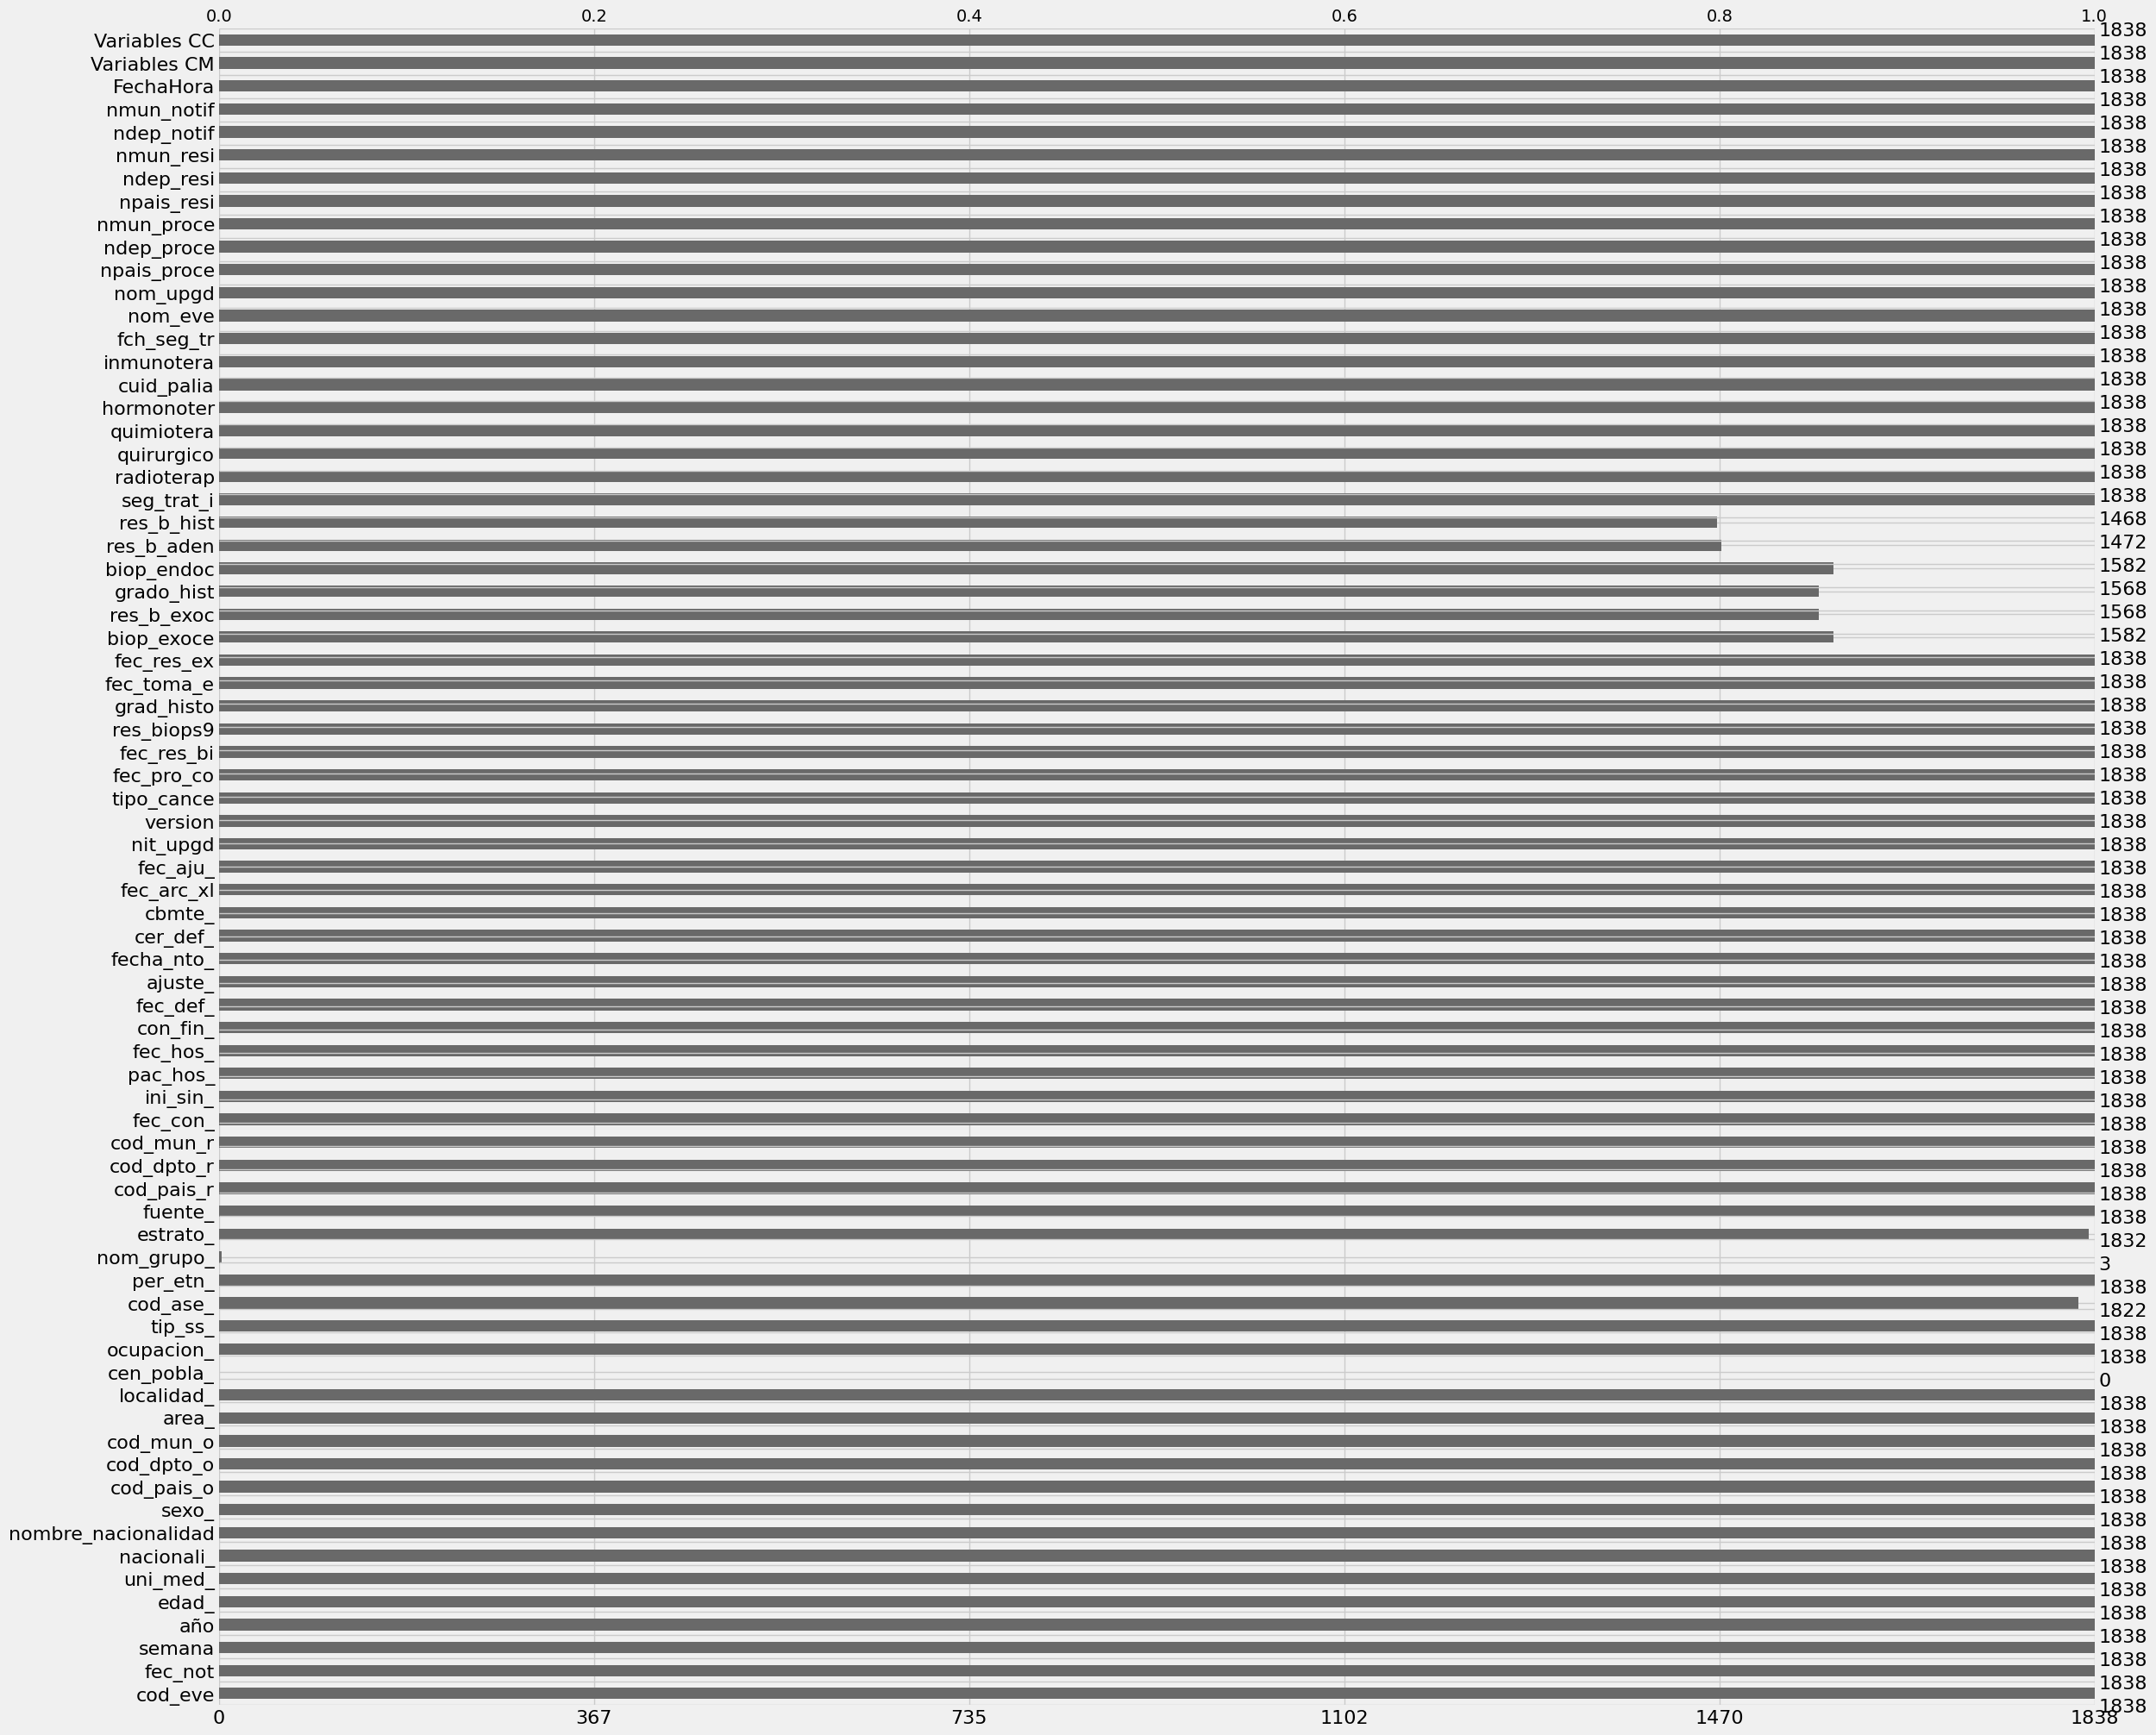

In [ ]:
# Buscando valores perdidos

import missingno as msno
msno.bar(df)
plt.show()

In [ ]:
# Calcular métricas
resumen_datos = pd.DataFrame({
    'Variable': df.columns,
    'Porcentaje de Datos Disponibles (%)': df.notnull().mean() * 100,
    'Número de Datos Faltantes': df.isnull().sum(),
    'Tipo de Dato': df.dtypes,
    'Valores Únicos': df.nunique()
})

# Ordenar por porcentaje de datos disponibles
resumen_datos.sort_values(by="Porcentaje de Datos Disponibles (%)", ascending=True, inplace=True)

In [ ]:
# Aplicar formato condicional en Jupyter Notebook
styled_resumen = resumen_datos.style.applymap(
    lambda x: "background-color: red" if isinstance(x, (int, float)) and x < 50 else
              ("background-color: yellow" if isinstance(x, (int, float)) and x < 80 else
               "background-color: lightgreen"),
    subset=['Porcentaje de Datos Disponibles (%)']
)

styled_resumen

,Variable,Porcentaje de Datos Disponibles (%),Número de Datos Faltantes,Tipo de Dato,Valores Únicos
cen_pobla_,cen_pobla_,0.000000,1838,float64,0
nom_grupo_,nom_grupo_,0.163221,1835,object,3
res_b_hist,res_b_hist,79.869423,370,object,4
res_b_aden,res_b_aden,80.087051,366,object,3
res_b_exoc,res_b_exoc,85.310120,270,object,3
grado_hist,grado_hist,85.310120,270,object,4
biop_exoce,biop_exoce,86.071817,256,object,3
biop_endoc,biop_endoc,86.071817,256,object,3
cod_ase_,cod_ase_,99.129489,16,object,40
estrato_,estrato_,99.673558,6,float64,6


In [ ]:
# Verificar qué columnas están presentes antes de eliminarlas
columns_to_drop = [
    'iden_gener', 'otra_ident', 'orient_sex', 'otra_orien', 'vereda_',
    'sem_ges_', 'uni_modif', 'nuni_modif', 'fm_fuerza', 'fm_unidad',
    'fm_grado', 'res_biopsi', 'grad_hi_cu', 'cla_cie_hi'
]

# Mantener solo las columnas presentes en el DataFrame
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Eliminar las columnas presentes
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
import pandas as pd

# Cargar el archivo transformado hasta el paso anterior
file_path = 'D:\Escritorio\CABARRANQUILLA\Ca mama de  y cuello uterino\CAMAMA2022-2024_final_with_localidad_mapping.xlsx'  # Cambia a la ruta de tu archivo
df = pd.read_excel(file_path)

# Diccionario de mapeo consolidado para unificar nombres de localidades
mapeo_localidades = {
    # SUROCCIDENTE
    'SUROCCIDENTE': 'SUROCCIDENTE', 'SUR OCCIDENTE': 'SUROCCIDENTE', 'SUIR OCCIDENTE': 'SUROCCIDENTE',
    'SUR OCICIDENTE': 'SUROCCIDENTE', 'SUROOCIDENTE': 'SUROCCIDENTE', 'SUROCIDENTE': 'SUROCCIDENTE',
    'SUR OCCDIENTE': 'SUROCCIDENTE', 'SUR  OCCIDENTE': 'SUROCCIDENTE',

    # RIOMAR
    'RIOMAR': 'RIOMAR', 'RIOAMAR': 'RIOMAR',

    # NORTE CENTRO HISTORICO
    'NORTE CENTRO': 'NORTE CENTRO HISTORICO', 'NORTE CENTRO HISTOR': 'NORTE CENTRO HISTORICO',
    'NORTE CENTRO HIST': 'NORTE CENTRO HISTORICO', 'NORTE CENTRO HISTORI': 'NORTE CENTRO HISTORICO',
    'NORTE CENTRO HISTO': 'NORTE CENTRO HISTORICO', 'NORTE CENTRO HIS': 'NORTE CENTRO HISTORICO',
    'NORTE CENTRO HISRICO': 'NORTE CENTRO HISTORICO', 'NORTE CENTROHISTORIC': 'NORTE CENTRO HISTORICO',
    'NORTECENTROHISTORICO': 'NORTE CENTRO HISTORICO', 'NORTE CENTRO HITORIC': 'NORTE CENTRO HISTORICO',
    'NORTE C HISTORICO': 'NORTE CENTRO HISTORICO', 'CENTRO HISTORICO': 'NORTE CENTRO HISTORICO',
    'NORTE HISTORICO': 'NORTE CENTRO HISTORICO', 'NORTECENTRO HISTORIC': 'NORTE CENTRO HISTORICO',
    'N CENTRO HISTORICO': 'NORTE CENTRO HISTORICO', 'CENTRO': 'NORTE CENTRO HISTORICO',
    'NORTE CENTRO  HISTO': 'NORTE CENTRO HISTORICO',

    # SURORIENTE
    'SUR ORIENTE': 'SURORIENTE', 'SUR ORENTE': 'SURORIENTE', 'SUR ORIENTENTE': 'SURORIENTE',
    'SRORIENTE': 'SURORIENTE', 'SUR  ORIENTE': 'SURORIENTE',

    # METROPOLITANA
    'METROPOLITANA': 'METROPOLITANA', 'METROPOLOTANA': 'METROPOLITANA', 'METROLPOLITANA': 'METROPOLITANA',
    'METROPOLITINA': 'METROPOLITANA', 'METROPILITANA': 'METROPOLITANA', 'AREA METROPOLITANA': 'METROPOLITANA',
    'MERTROPOLITANA': 'METROPOLITANA', 'METROPOLITANO': 'METROPOLITANA', 'METROPOLITAN': 'METROPOLITANA',
    'METROPLITANA': 'METROPOLITANA',

    # BARRANQUILLA
    'BARRANQUILLA': 'BARRANQUILLA', 'BARRAQUILLA': 'BARRANQUILLA', 'BARRANQULLA': 'BARRANQUILLA',
    'BARRANQUIÑLA': 'BARRANQUILLA', 'BARRANQUILA': 'BARRANQUILLA',

    # SIN INFORMACION
    'SIN INFORMACION': 'SIN INFORMACION', 'SIN  INFORMACION': 'SIN INFORMACION', 'SIN INFO': 'SIN INFORMACION',
    'SIN INFOR': 'SIN INFORMACION', 'SIN INFOR ACION': 'SIN INFORMACION', 'SIN IFORMACION': 'SIN INFORMACION',
    'SIN INFOAMCION': 'SIN INFORMACION', 'SIN INFIRMACION': 'SIN INFORMACION', 'SIN INFOORMACIONN': 'SIN INFORMACION',
    'SIN INOFORMACION': 'SIN INFORMACION', 'SIN INFOORMACION': 'SIN INFORMACION', 'SIN INFORMACIION': 'SIN INFORMACION',
    'SINN INFORMACION': 'SIN INFORMACION', 'SINN INFORMACIION': 'SIN INFORMACION', 'SIN INFROMACION': 'SIN INFORMACION',
    'SIN INFORMAION': 'SIN INFORMACION', 'SIN INFORMACIOIN': 'SIN INFORMACION', 'SIN INFORMACIONN': 'SIN INFORMACION',
    'SIN INFOORMACIONN': 'SIN INFORMACION', 'SIN DATOS': 'SIN INFORMACION', 'SIN DATO': 'SIN INFORMACION',

    # Otros casos conocidos
    'CENTRO HISTORICO': 'CENTRO HISTORICO', 'MALAMBO': 'MALAMBO', 'SOLEDAD': 'SOLEDAD', 'SANTO TOMAS': 'SANTO TOMAS',
    'GALAPA': 'GALAPA', 'LA LUZ': 'LA LUZ', 'LA PLAYA': 'LA PLAYA', 'BELLA ARENA': 'BELLA ARENA',
    'NORTE': 'NORTE', 'SAN JACINTO': 'SAN JACINTO', 'PUERTO COLOMBIA': 'PUERTO COLOMBIA', 'CARTAJENA': 'CARTAGENA',
    'CANDELARIA': 'CANDELARIA', 'VALLEDUPAR': 'VALLEDUPAR', 'ATLANTICO': 'ATLANTICO',

    # Barrio nombres específicos
    'BARRIO LOS OLIVOS 2': 'BARRIO LOS OLIVOS', 'BARRIO 7 ABRIL': 'BARRIO 7 ABRIL', 'BARRIO REMOLINO': 'BARRIO REMOLINO',

    # Otros nombres corregidos
    'CORDOBA': 'CORDOBA', 'COLOMBIA': 'COLOMBIA', 'COLOMBIIA': 'COLOMBIA'
}

# Aplicar el mapeo en la columna 'localidad_'
df['localidad_'] = df['localidad_'].replace(mapeo_localidades)

# Convertir todos los valores considerados como "SIN INFORMACION" en la columna de localidades
sin_informacion_valores = ['SIN DATOS', 'SIN DATO', '99999999999999999999', 1, 2, 9999, 99999, 170, '08001']
df['localidad_'] = df['localidad_'].apply(lambda x: 'SIN INFORMACION' if pd.isnull(x) or isinstance(x, (int, float)) or x in sin_informacion_valores else x)




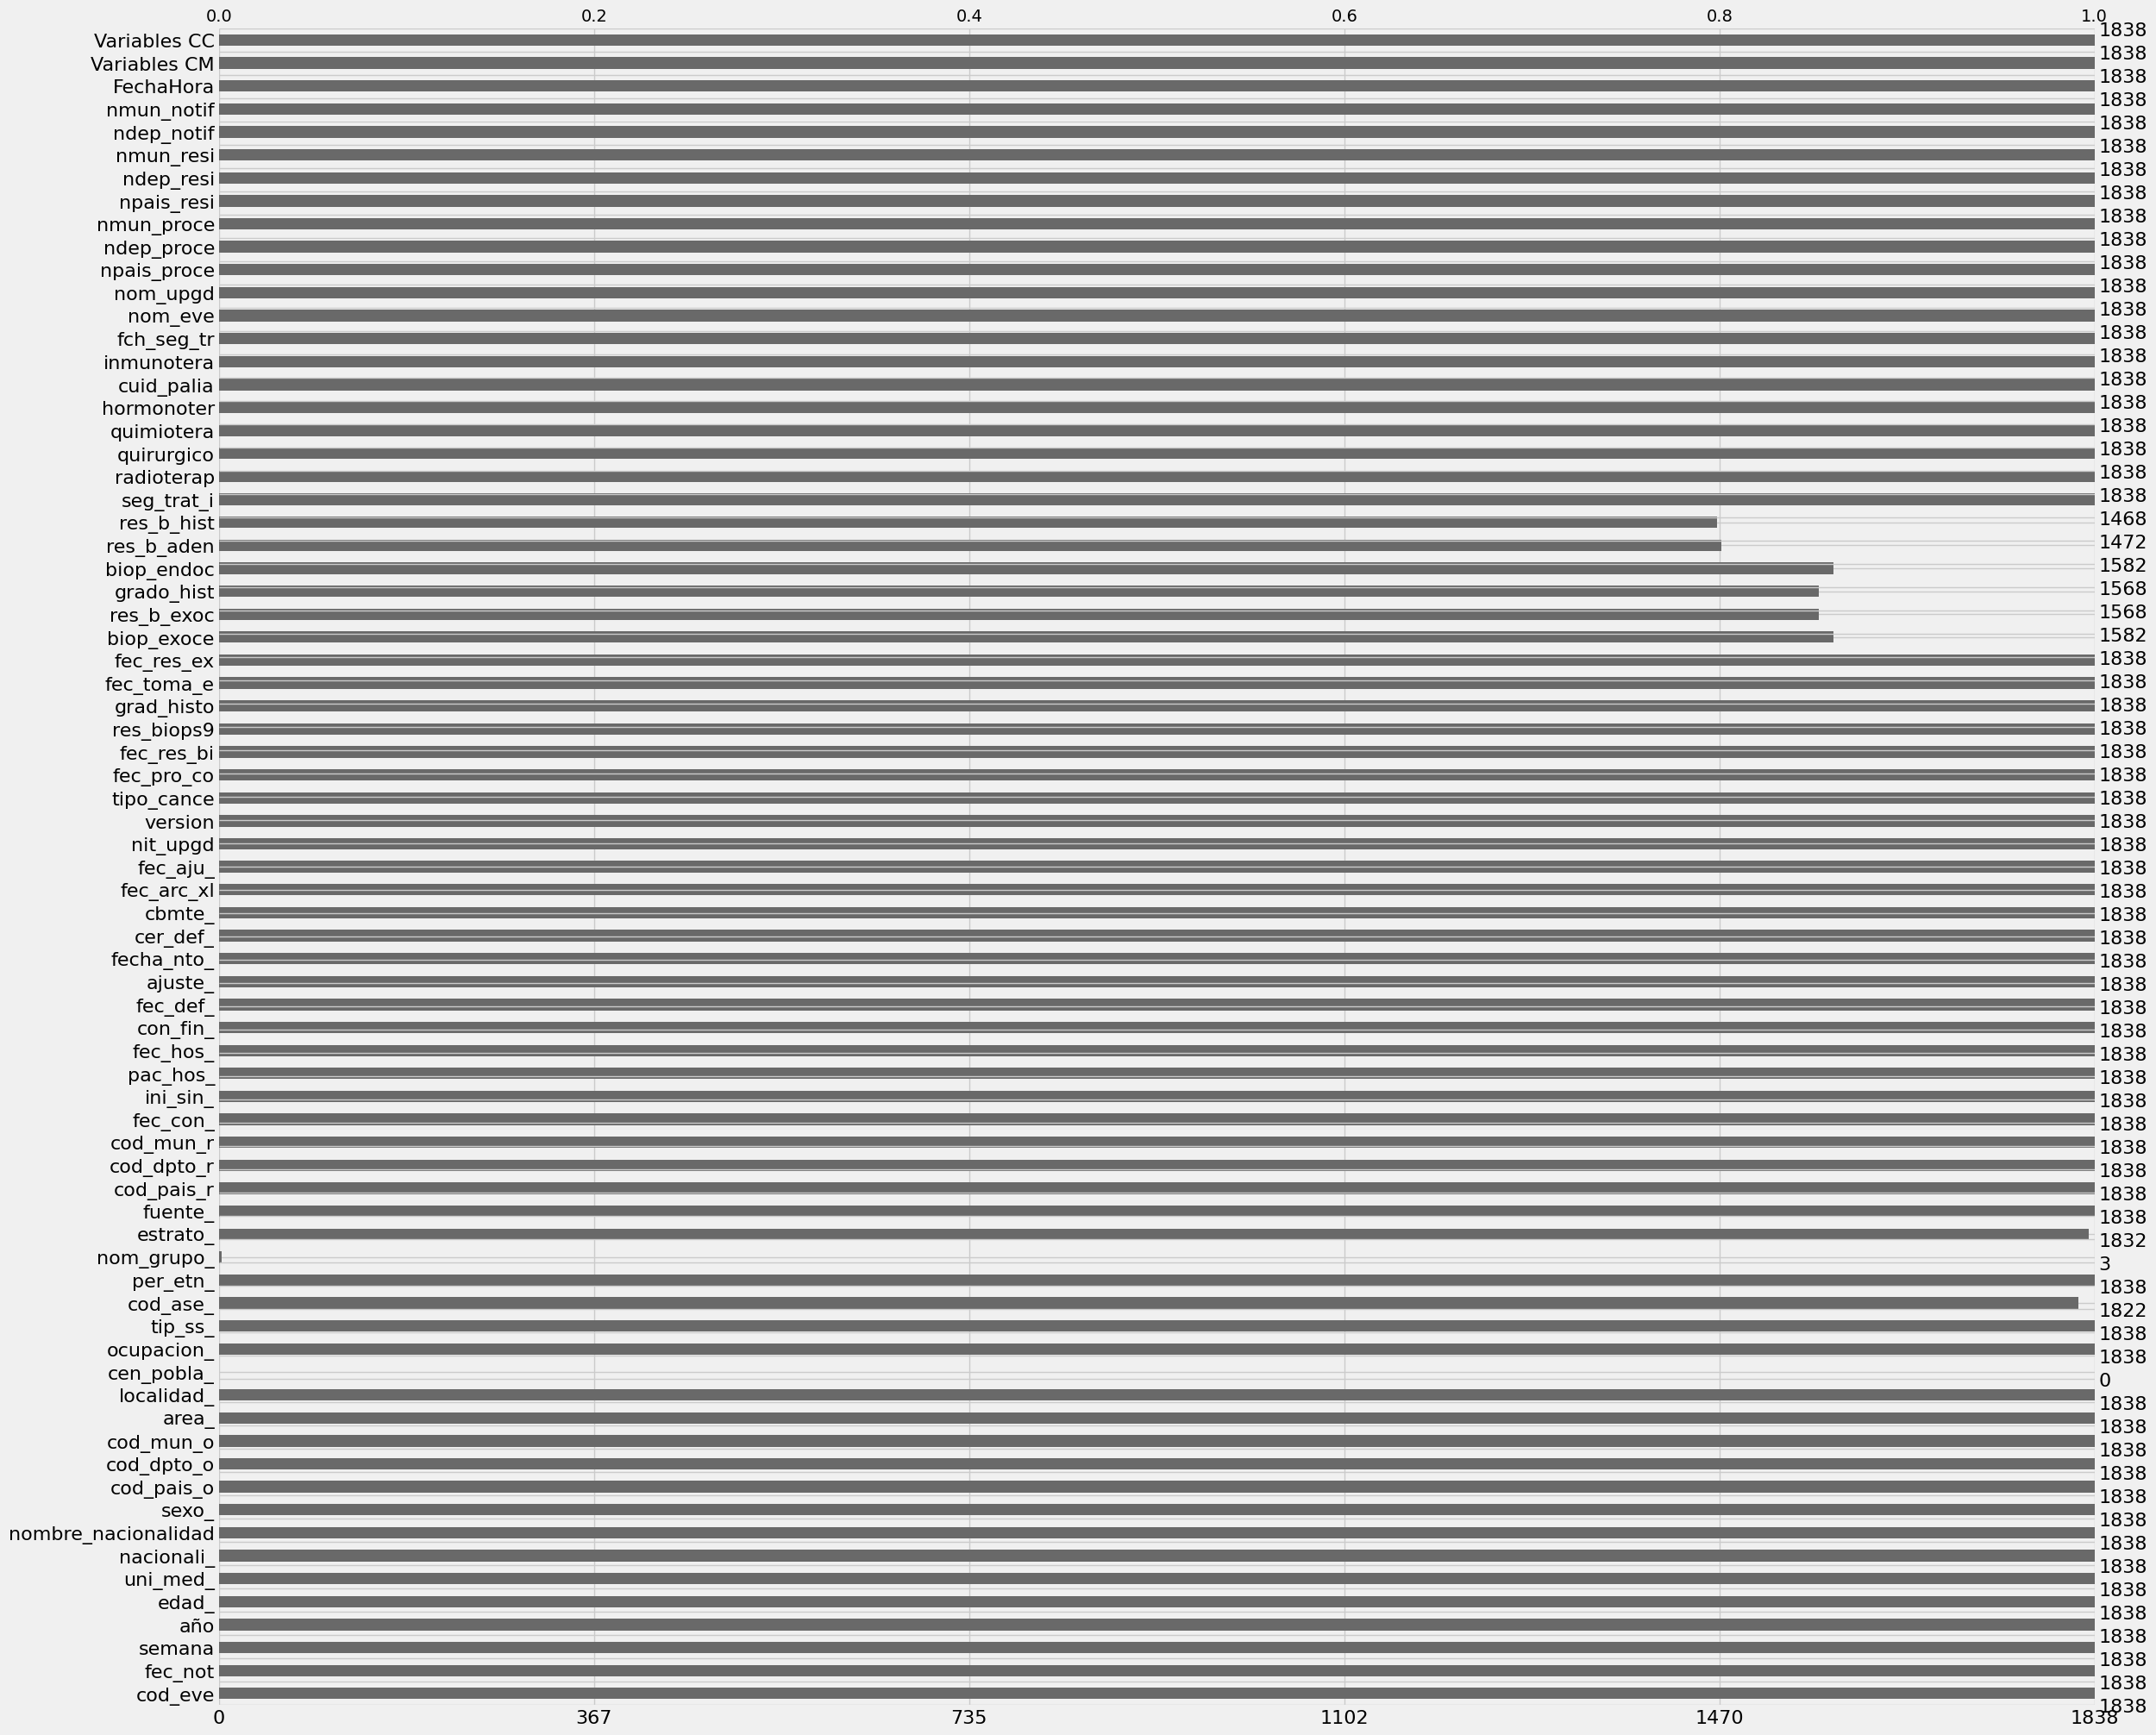

In [ ]:
msno.bar(df)
plt.show()

In [ ]:
# Calcular métricas
resumen_datos = pd.DataFrame({
    'Variable': df.columns,
    'Porcentaje de Datos Disponibles (%)': df.notnull().mean() * 100,
    'Número de Datos Faltantes': df.isnull().sum(),
    'Tipo de Dato': df.dtypes,
    'Valores Únicos': df.nunique()
})

# Ordenar por porcentaje de datos disponibles
resumen_datos.sort_values(by="Porcentaje de Datos Disponibles (%)", ascending=True, inplace=True)

In [ ]:
# Aplicar formato condicional en Jupyter Notebook
styled_resumen = resumen_datos.style.applymap(
    lambda x: "background-color: red" if isinstance(x, (int, float)) and x < 50 else
              ("background-color: yellow" if isinstance(x, (int, float)) and x < 80 else
               "background-color: lightgreen"),
    subset=['Porcentaje de Datos Disponibles (%)']
)

styled_resumen

,Variable,Porcentaje de Datos Disponibles (%),Número de Datos Faltantes,Tipo de Dato,Valores Únicos
cen_pobla_,cen_pobla_,0.000000,1838,float64,0
nom_grupo_,nom_grupo_,0.163221,1835,object,3
res_b_hist,res_b_hist,79.869423,370,object,4
res_b_aden,res_b_aden,80.087051,366,object,3
res_b_exoc,res_b_exoc,85.310120,270,object,3
grado_hist,grado_hist,85.310120,270,object,4
biop_exoce,biop_exoce,86.071817,256,object,3
biop_endoc,biop_endoc,86.071817,256,object,3
cod_ase_,cod_ase_,99.129489,16,object,40
estrato_,estrato_,99.673558,6,float64,6


In [ ]:
# Exploración adicional en las primeras columnas para entender mejor la distribución de valores numéricos y categóricos
# Seleccionaremos unas muestras de variables numéricas y categóricas para revisar más a fondo su distribución y valores nulos

# Selección de algunas variables representativas para análisis
numeric_cols = ['edad_', 'semana', 'año']  # Variables numéricas
categorical_cols = ['ndep_notif', 'nmun_notif']  # Variables categóricas
date_cols = ['fec_not', 'FechaHora']  # Variables de fecha

# Análisis descriptivo de variables numéricas
numeric_summary = df[numeric_cols].describe()

# Conteo de valores únicos y frecuencias para las categóricas
categorical_summary = {col: df[col].value_counts(dropna=False) for col in categorical_cols}


numeric_summary, categorical_summary

(             edad_       semana          año
 count  1838.000000  1838.000000  1838.000000
 mean     57.177367    25.707291  2023.192057
 std      14.305367    13.873299     0.746323
 min      24.000000     1.000000  2022.000000
 25%      47.000000    14.000000  2023.000000
 50%      58.000000    26.000000  2023.000000
 75%      67.000000    35.000000  2024.000000
 max      98.000000    52.000000  2024.000000,
 {'ndep_notif': ndep_notif
  ATLANTICO          1824
  BOGOTA                7
  BOLIVAR               4
  CESAR                 1
  SUCRE                 1
  NORTE SANTANDER       1
  Name: count, dtype: int64,
  'nmun_notif': nmun_notif
  BARRANQUILLA    1785
  SOLEDAD           39
  BOGOTA             7
  CARTAGENA          4
  VALLEDUPAR         1
  SINCELEJO          1
  CUCUTA             1
  Name: count, dtype: int64})

In [ ]:
# Aplicación de las imputaciones según las indicaciones
df['edad_'].fillna(df['edad_'].median(), inplace=True)  # Imputar edad con mediana
df['semana'].fillna(df['semana'].median(), inplace=True)  # Imputar semana con mediana
df['año'].fillna(df['año'].mode()[0], inplace=True)  # Imputar año con la moda

# Imputación para variables categóricas
df['ndep_notif'].fillna('ATLANTICO', inplace=True)  # Imputar ndep_notif con 'ATLANTICO'
df['nmun_notif'].fillna('BARRANQUILLA', inplace=True)  # Imputar nmun_notif con 'BARRANQUILLA'

# Verificación de imputaciones realizadas
imputation_check = {
    'edad_': df['edad_'].isnull().sum(),
    'semana': df['semana'].isnull().sum(),
    'año': df['año'].isnull().sum(),
    'ndep_notif': df['ndep_notif'].isnull().sum(),
    'nmun_notif': df['nmun_notif'].isnull().sum(),
    'fec_not': df['fec_not'].isnull().sum(),
    'FechaHora': df['FechaHora'].isnull().sum()
}

imputation_check

{'edad_': 0,
 'semana': 0,
 'año': 0,
 'ndep_notif': 0,
 'nmun_notif': 0,
 'fec_not': 0,
 'FechaHora': 0}

In [ ]:
# Análisis de valores faltantes en todas las columnas para identificar variables con nulos pendientes
missing_values_overview = df.isnull().sum()
missing_values_overview = missing_values_overview[missing_values_overview > 0].sort_values(ascending=False)

# Mostrar las columnas con valores nulos pendientes
missing_values_overview

cen_pobla_    1838
nom_grupo_    1835
res_b_hist     370
res_b_aden     366
res_b_exoc     270
grado_hist     270
biop_exoce     256
biop_endoc     256
cod_ase_        16
estrato_         6
dtype: int64

In [ ]:
# Realizar las imputaciones según las indicaciones

# Imputación de valores nulos en columnas con casi todos los datos faltantes (cen_pobla_ y nom_grupo_)
df.drop(columns=['cen_pobla_', 'nom_grupo_'], inplace=True)

# Imputación de columnas relacionadas con resultados y grados con la categoría "Desconocido"
unknown_fill_cols = ['res_b_hist', 'res_b_aden', 'res_b_exoc', 'grado_hist', 'biop_exoce', 'biop_endoc']
for col in unknown_fill_cols:
    df[col].fillna('Desconocido', inplace=True)

# Imputación de cod_ase_ con "Desconocido"
df['cod_ase_'].fillna('Desconocido', inplace=True)

# Imputación de estrato_ con la moda
df['estrato_'].fillna(df['estrato_'].mode()[0], inplace=True)

# Verificación de que no queden valores nulos
final_missing_values_check = df.isnull().sum().sum()  # Suma total de valores nulos restantes

final_missing_values_check


0

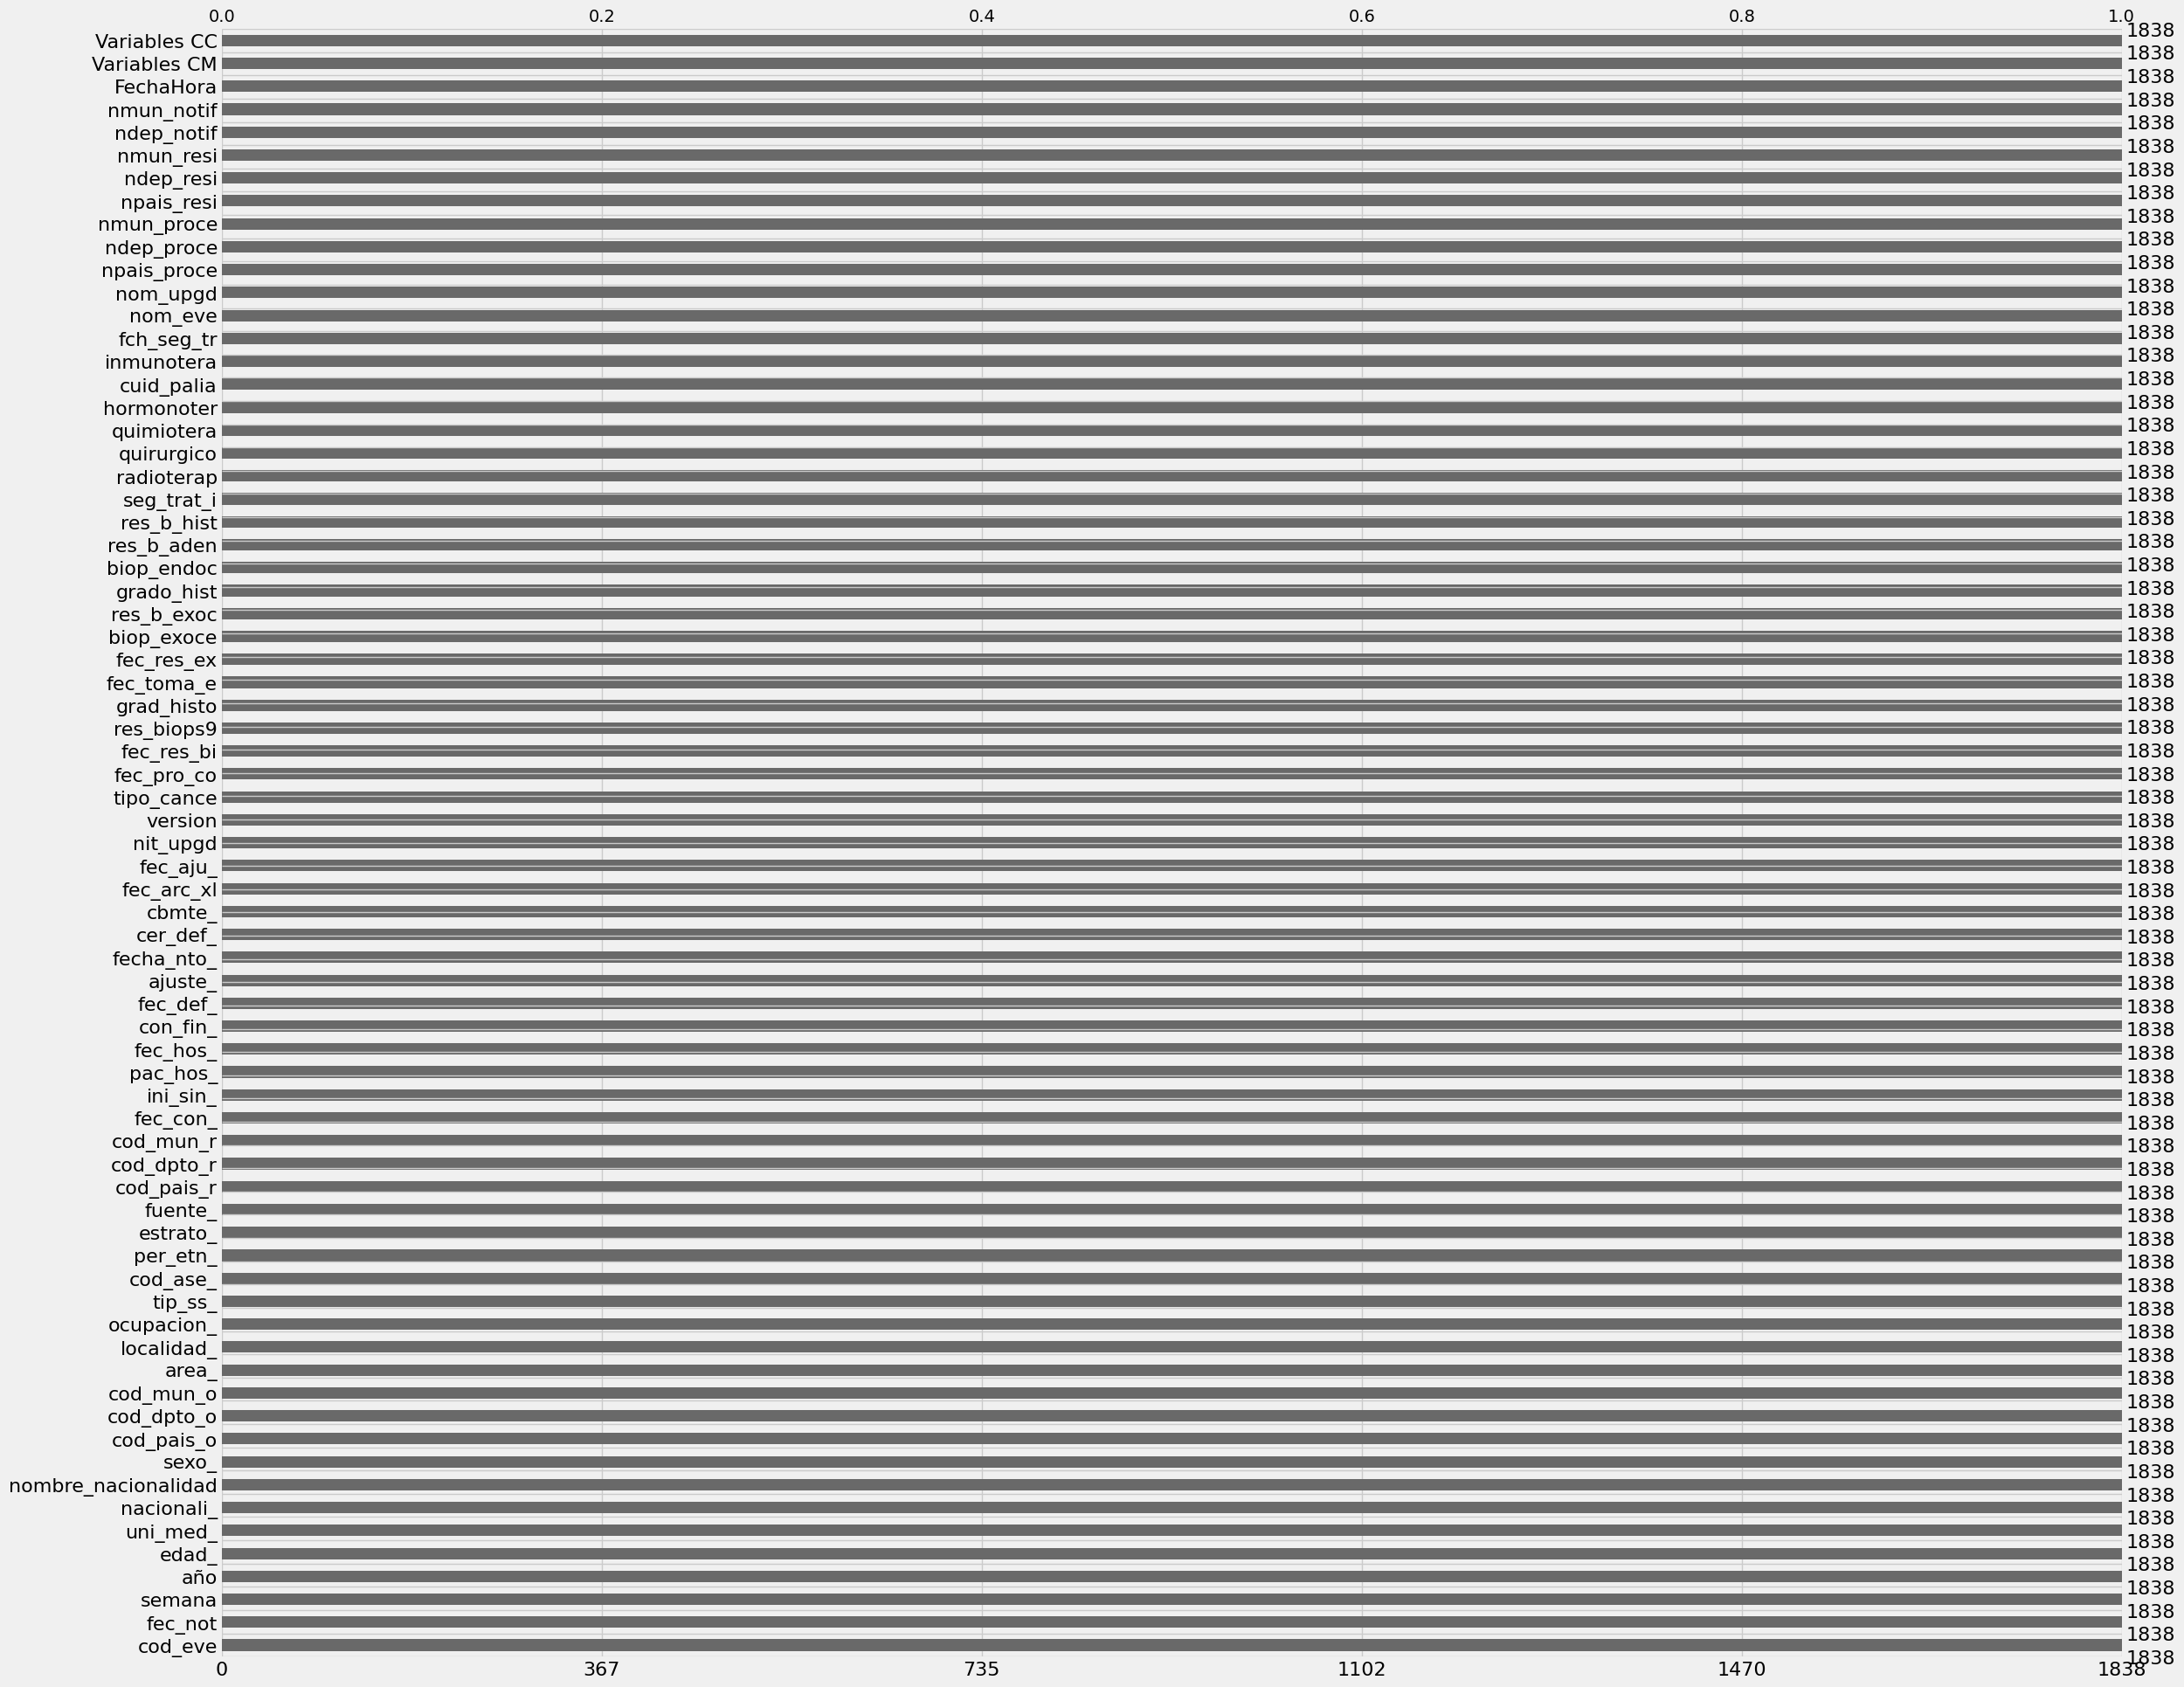

In [ ]:
msno.bar(df)
plt.show()

In [ ]:
# Calcular métricas
resumen_datos = pd.DataFrame({
    'Variable': df.columns,
    'Porcentaje de Datos Disponibles (%)': df.notnull().mean() * 100,
    'Número de Datos Faltantes': df.isnull().sum(),
    'Tipo de Dato': df.dtypes,
    'Valores Únicos': df.nunique()
})

# Ordenar por porcentaje de datos disponibles
resumen_datos.sort_values(by="Porcentaje de Datos Disponibles (%)", ascending=True, inplace=True)

In [ ]:
# Aplicar formato condicional en Jupyter Notebook
styled_resumen = resumen_datos.style.applymap(
    lambda x: "background-color: red" if isinstance(x, (int, float)) and x < 50 else
              ("background-color: yellow" if isinstance(x, (int, float)) and x < 80 else
               "background-color: lightgreen"),
    subset=['Porcentaje de Datos Disponibles (%)']
)

styled_resumen

,Variable,Porcentaje de Datos Disponibles (%),Número de Datos Faltantes,Tipo de Dato,Valores Únicos
cod_eve,cod_eve,100.000000,0,int64,1
seg_trat_i,seg_trat_i,100.000000,0,int64,2
res_b_hist,res_b_hist,100.000000,0,object,5
res_b_aden,res_b_aden,100.000000,0,object,4
biop_endoc,biop_endoc,100.000000,0,object,4
grado_hist,grado_hist,100.000000,0,object,5
res_b_exoc,res_b_exoc,100.000000,0,object,4
radioterap,radioterap,100.000000,0,object,4
biop_exoce,biop_exoce,100.000000,0,object,4
fec_toma_e,fec_toma_e,100.000000,0,object,314


In [ ]:
# Intentar nuevamente obtener las columnas que empiezan con 'fec'
date_columns = [col for col in df.columns if col.startswith('fec')]
date_columns


['fec_not',
 'fec_con_',
 'fec_hos_',
 'fec_def_',
 'fecha_nto_',
 'fec_arc_xl',
 'fec_aju_',
 'fec_pro_co',
 'fec_res_bi',
 'fec_toma_e',
 'fec_res_ex']

In [ ]:
# Reemplazar "No aplica" con NaT para ambas columnas y luego convertirlas a formato de fecha
df['fec_pro_co'] = pd.to_datetime(df['fec_pro_co'].replace("No aplica", pd.NaT), errors='coerce')
df['fec_res_bi'] = pd.to_datetime(df['fec_res_bi'].replace("No aplica", pd.NaT), errors='coerce')

# Calcular la diferencia en días entre las fechas de procedimiento y resultado, excluyendo los valores nulos
df['diff_pro_res_bi'] = (df['fec_res_bi'] - df['fec_pro_co']).dt.days

# Ver los resultados estadísticos de la diferencia
df['diff_pro_res_bi'].describe()

count    1437.000000
mean       14.972860
std        45.010568
min         0.000000
25%         7.000000
50%        11.000000
75%        17.000000
max      1480.000000
Name: diff_pro_res_bi, dtype: float64

Hay 1,437 registros con ambos datos disponibles.
- La media es de aproximadamente 15 días, lo que indica que, en promedio, los resultados de la biopsia se obtienen dos semanas después del procedimiento.
- La mediana es de 11 días, lo que sugiere que la mitad de los casos recibe resultados en poco más de una semana.
- El mínimo es 0, lo que implica que algunos resultados se obtuvieron el mismo día del procedimiento.
- El máximo es 1,480 días, lo cual podría indicar algún caso atípico o un posible error de entrada.

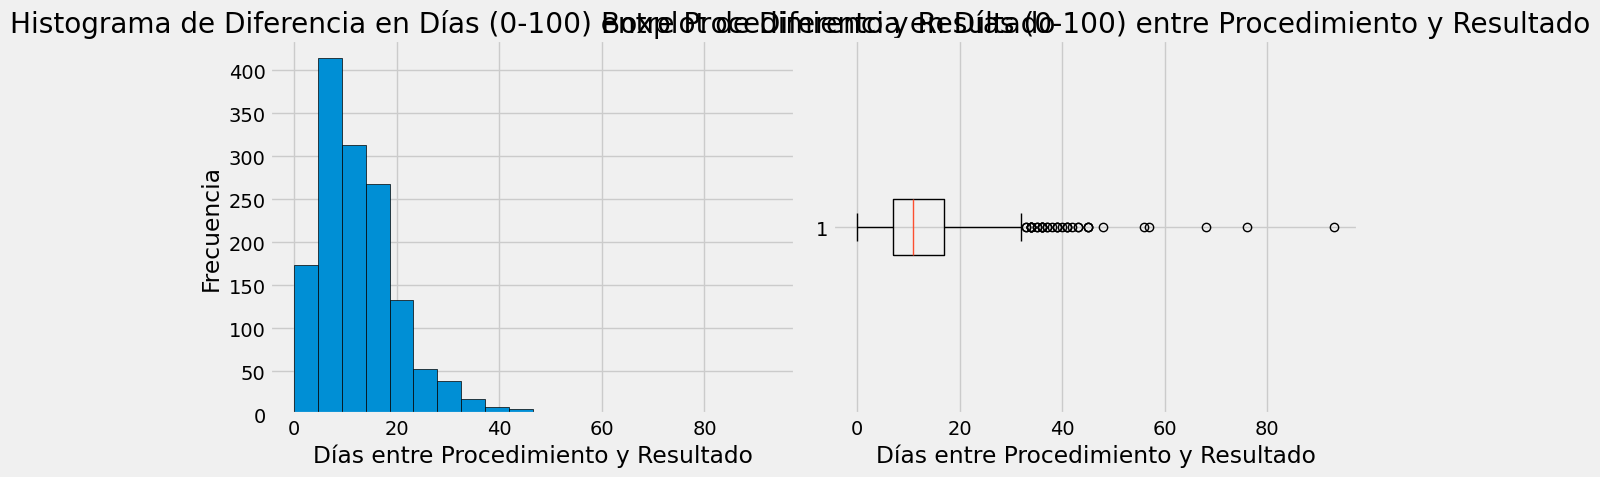

In [ ]:
import matplotlib.pyplot as plt

# Filtrar los datos para incluir solo las diferencias de hasta 100 días
filtered_df = df[df['diff_pro_res_bi'] <= 100]

# Configuración del tamaño de los gráficos
plt.figure(figsize=(12, 5))

# Histograma ajustado de la diferencia de días
plt.subplot(1, 2, 1)
plt.hist(filtered_df['diff_pro_res_bi'].dropna(), bins=20, edgecolor='k')
plt.title('Histograma de Diferencia en Días (0-100) entre Procedimiento y Resultado')
plt.xlabel('Días entre Procedimiento y Resultado')
plt.ylabel('Frecuencia')

# Boxplot ajustado de la diferencia de días
plt.subplot(1, 2, 2)
plt.boxplot(filtered_df['diff_pro_res_bi'].dropna(), vert=False)
plt.title('Boxplot de Diferencia en Días (0-100) entre Procedimiento y Resultado')
plt.xlabel('Días entre Procedimiento y Resultado')

plt.tight_layout()
plt.show()


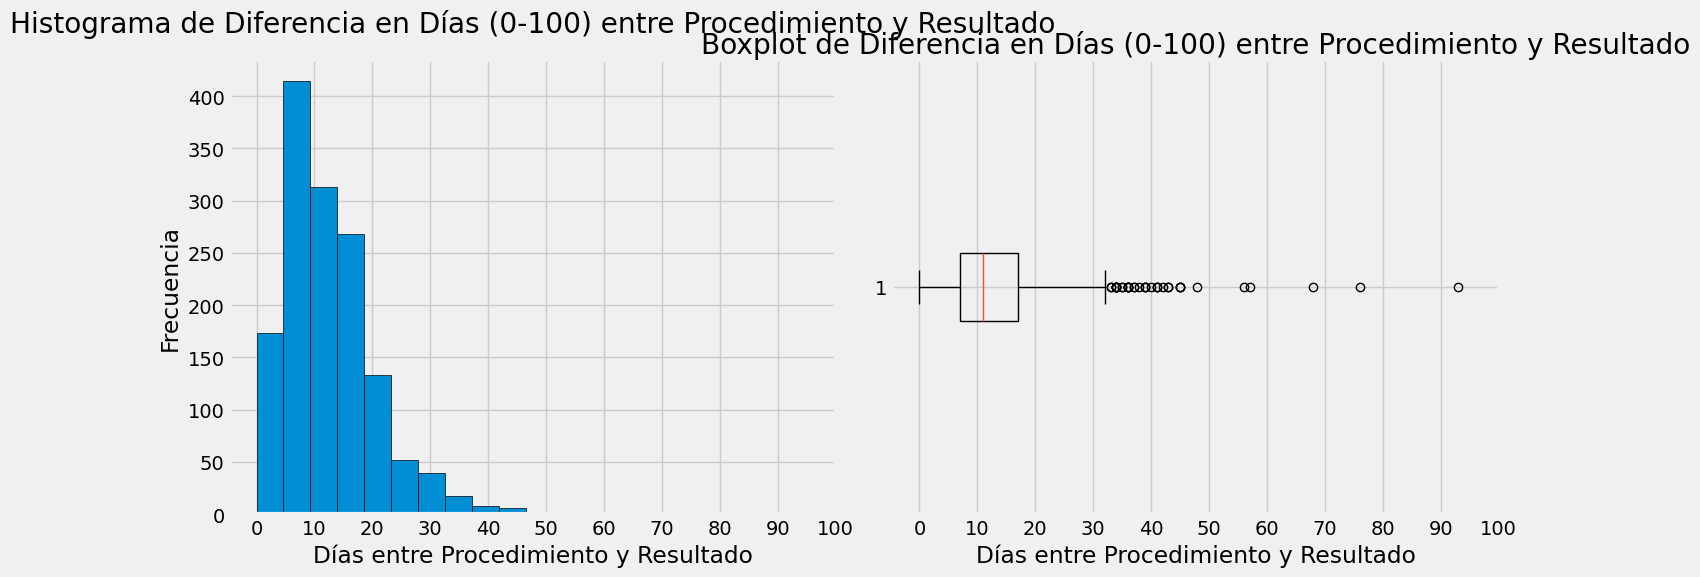

In [ ]:


# Configuración del tamaño de los gráficos
plt.figure(figsize=(14, 6))

# Histograma ajustado de la diferencia de días con etiquetas detalladas en el eje X
plt.subplot(1, 2, 1)
plt.hist(filtered_df['diff_pro_res_bi'].dropna(), bins=20, edgecolor='k')
plt.title('Histograma de Diferencia en Días (0-100) entre Procedimiento y Resultado', pad=20)
plt.xlabel('Días entre Procedimiento y Resultado')
plt.ylabel('Frecuencia')
plt.xticks(range(0, 101, 10))  # Etiquetas de eje X con incrementos de 5 días

# Boxplot ajustado de la diferencia de días
plt.subplot(1, 2, 2)
plt.boxplot(filtered_df['diff_pro_res_bi'].dropna(), vert=False)
plt.title('Boxplot de Diferencia en Días (0-100) entre Procedimiento y Resultado', pad=5)
plt.xlabel('Días entre Procedimiento y Resultado')
plt.xticks(range(0, 101, 10))  # Etiquetas de eje X con incrementos de 5 días

plt.tight_layout()
plt.show()


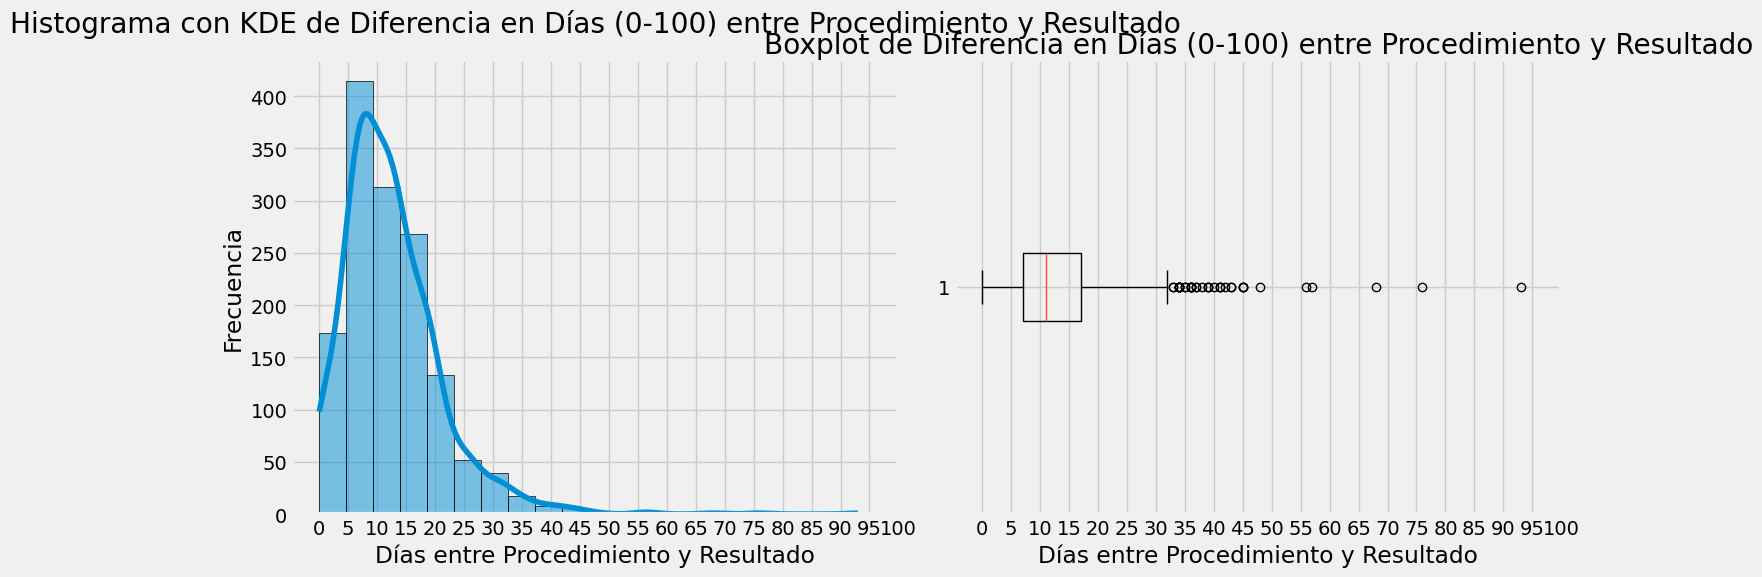

In [ ]:

import seaborn as sns

# Configuración del tamaño de los gráficos
plt.figure(figsize=(14, 6))

# Histograma con KDE de la diferencia de días
plt.subplot(1, 2, 1)
sns.histplot(filtered_df['diff_pro_res_bi'].dropna(), bins=20, kde=True, edgecolor='k')
plt.title('Histograma con KDE de Diferencia en Días (0-100) entre Procedimiento y Resultado', pad=20)
plt.xlabel('Días entre Procedimiento y Resultado')
plt.ylabel('Frecuencia')
plt.xticks(range(0, 101, 5))  # Etiquetas de eje X con incrementos de 5 días

# Boxplot ajustado de la diferencia de días
plt.subplot(1, 2, 2)
plt.boxplot(filtered_df['diff_pro_res_bi'].dropna(), vert=False)
plt.title('Boxplot de Diferencia en Días (0-100) entre Procedimiento y Resultado', pad=5)
plt.xlabel('Días entre Procedimiento y Resultado')
plt.xticks(range(0, 101, 5))  # Etiquetas de eje X con incrementos de 5 días

plt.tight_layout()
plt.show()


    Distribución Asimétrica a la Derecha:
        La distribución muestra una concentración significativa de datos en los primeros días (de 0 a 20 días), con un descenso rápido a medida que aumentan los días. Esto sugiere que la mayoría de los resultados se obtienen en un corto período después del procedimiento.
        La cola hacia la derecha indica que algunos pacientes esperan más tiempo por sus resultados, aunque estos son relativamente pocos en comparación con la mayoría.

    Valores Atípicos:
        El boxplot revela algunos valores atípicos que se encuentran entre los 30 y 100 días. Estos valores, aunque poco frecuentes, representan casos con tiempos de espera significativamente más largos.
        Los valores extremos (por ejemplo, 60+ días) podrían ser revisados para entender si son errores de registro o si corresponden a casos específicos que justifican un tiempo de espera más largo.

    Media vs. Mediana:
        La mediana en el boxplot parece estar alrededor de los 10-15 días, lo cual confirma que, para la mayoría de los casos, el tiempo de espera es corto. La media es un poco mayor debido a los valores atípicos en la cola derecha.

    KDE para Visualización Detallada:
        La curva KDE confirma que la mayor densidad de los tiempos de espera se encuentra entre los 5 y 20 días, lo cual es consistente con el objetivo de obtener resultados relativamente rápido.
        La suavidad del KDE ayuda a ver la tendencia general y muestra que después de los 20 días, la probabilidad de esperar más tiempo disminuye drásticamente.

En general, el análisis sugiere que el tiempo de espera entre el procedimiento y el resultado suele ser razonable para la mayoría de los pacientes, pero existen algunos casos con tiempos de espera atípicos que podrían ser analizados más a fondo para determinar sus causas.

In [ ]:
# Filtrar los datos para el caso específico donde la diferencia en días es 1480

outlier_1480_case = df[df['diff_pro_res_bi'] == 1480]

outlier_1480_case


,cod_eve,fec_not,semana,año,edad_,uni_med_,nacionali_,nombre_nacionalidad,sexo_,cod_pais_o,...,nmun_proce,npais_resi,ndep_resi,nmun_resi,ndep_notif,nmun_notif,FechaHora,Variables CM,Variables CC,diff_pro_res_bi
1447,155,2024-04-30,18,2024,42,1,170,COLOMBIA,F,170,...,BARRANQUILLA,COLOMBIA,ATLANTICO,BARRANQUILLA,ATLANTICO,BARRANQUILLA,2024-05-07,"[datetime.datetime(2020, 3, 20, 0, 0), datetim...",No aplica,1480.0


In [ ]:
# Paso 1: Verificación de la integridad de los datos para cada grupo (MAMA y CUELLO)

# Dividir el conjunto de datos en los grupos MAMA (Tipo_cance = 1) y CUELLO (Tipo_cance = 2)
grupo_mama = df[df['tipo_cance'] == 1]
grupo_cuello = df[df['tipo_cance'] == 2]

# Verificar las columnas relevantes en cada grupo para asegurar la presencia/ausencia de datos
# Grupo MAMA
mama_columns_presence = grupo_mama[['fec_pro_co', 'fec_res_bi', 'res_biops9', 'grad_histo']].notnull().sum()
mama_columns_absence = grupo_mama[['fec_toma_e', 'fec_res_ex', 'biop_exoce', 'res_b_exoc', 'grado_hist',
                                   'biop_endoc', 'res_b_aden', 'res_b_hist', 'seg_trat_i', 'radioterap',
                                   'quirurgico', 'quimiotera', 'hormonoter', 'cuid_palia', 'inmunotera', 'fch_seg_tr']].isnull().sum()

# Grupo CUELLO
cuello_columns_presence = grupo_cuello[['fec_toma_e', 'fec_res_ex', 'biop_exoce', 'res_b_exoc', 'grado_hist',
                                        'biop_endoc', 'res_b_aden', 'res_b_hist']].notnull().sum()
cuello_columns_absence = grupo_cuello[['fec_pro_co', 'fec_res_bi', 'res_biops9', 'grad_histo', 'seg_trat_i',
                                       'radioterap', 'quirurgico', 'quimiotera', 'hormonoter', 'cuid_palia',
                                       'inmunotera', 'fch_seg_tr']].isnull().sum()

# Mostrar resultados de la verificación de integridad para ambos grupos
print("Grupo MAMA - Presencia de Datos:\n", mama_columns_presence)
print("\nGrupo MAMA - Ausencia de Datos:\n", mama_columns_absence)
print("\nGrupo CUELLO - Presencia de Datos:\n", cuello_columns_presence)
print("\nGrupo CUELLO - Ausencia de Datos:\n", cuello_columns_absence)


Grupo MAMA - Presencia de Datos:
 fec_pro_co    1437
fec_res_bi    1437
res_biops9    1437
grad_histo    1437
dtype: int64

Grupo MAMA - Ausencia de Datos:
 fec_toma_e    0
fec_res_ex    0
biop_exoce    0
res_b_exoc    0
grado_hist    0
biop_endoc    0
res_b_aden    0
res_b_hist    0
seg_trat_i    0
radioterap    0
quirurgico    0
quimiotera    0
hormonoter    0
cuid_palia    0
inmunotera    0
fch_seg_tr    0
dtype: int64

Grupo CUELLO - Presencia de Datos:
 fec_toma_e    401
fec_res_ex    401
biop_exoce    401
res_b_exoc    401
grado_hist    401
biop_endoc    401
res_b_aden    401
res_b_hist    401
dtype: int64

Grupo CUELLO - Ausencia de Datos:
 fec_pro_co    401
fec_res_bi    401
res_biops9      0
grad_histo      0
seg_trat_i      0
radioterap      0
quirurgico      0
quimiotera      0
hormonoter      0
cuid_palia      0
inmunotera      0
fch_seg_tr      0
dtype: int64


In [ ]:
# Reemplazar "No aplica" con NaT en las columnas de fecha para el grupo CUELLO
grupo_cuello['fec_toma_e'] = pd.to_datetime(grupo_cuello['fec_toma_e'].replace("No aplica", pd.NaT), errors='coerce')
grupo_cuello['fec_res_ex'] = pd.to_datetime(grupo_cuello['fec_res_ex'].replace("No aplica", pd.NaT), errors='coerce')

# Calcular la diferencia en días entre fec_toma_e y fec_res_ex
grupo_cuello['diff_pro_res_cuello'] = (grupo_cuello['fec_res_ex'] - grupo_cuello['fec_toma_e']).dt.days

# Estadísticas descriptivas para el grupo CUELLO
cuello_diff_stats = grupo_cuello['diff_pro_res_cuello'].describe()

print("Estadísticas descriptivas - Grupo CUELLO (diferencia en días):\n", cuello_diff_stats)


Estadísticas descriptivas - Grupo CUELLO (diferencia en días):
 count     399.000000
mean       22.416040
std       165.712372
min         0.000000
25%         7.000000
50%        11.000000
75%        17.500000
max      3295.000000
Name: diff_pro_res_cuello, dtype: float64


In [ ]:
# Paso 1: Cálculo de la diferencia de días para los grupos MAMA y CUELLO

# Grupo MAMA: Diferencia entre fec_pro_co y fec_res_bi
grupo_mama['diff_pro_res_mama'] = (grupo_mama['fec_res_bi'] - grupo_mama['fec_pro_co']).dt.days

# Grupo CUELLO: Diferencia entre fec_toma_e y fec_res_ex
grupo_cuello['diff_pro_res_cuello'] = (grupo_cuello['fec_res_ex'] - grupo_cuello['fec_toma_e']).dt.days

# Estadísticas descriptivas para ambos grupos
mama_diff_stats = grupo_mama['diff_pro_res_mama'].describe()
cuello_diff_stats = grupo_cuello['diff_pro_res_cuello'].describe()

# Mostrar resultados de estadísticas descriptivas
print("Estadísticas descriptivas - Grupo MAMA (diferencia en días):\n", mama_diff_stats)
print("\nEstadísticas descriptivas - Grupo CUELLO (diferencia en días):\n", cuello_diff_stats)


Estadísticas descriptivas - Grupo MAMA (diferencia en días):
 count    1437.000000
mean       14.972860
std        45.010568
min         0.000000
25%         7.000000
50%        11.000000
75%        17.000000
max      1480.000000
Name: diff_pro_res_mama, dtype: float64

Estadísticas descriptivas - Grupo CUELLO (diferencia en días):
 count     399.000000
mean       22.416040
std       165.712372
min         0.000000
25%         7.000000
50%        11.000000
75%        17.500000
max      3295.000000
Name: diff_pro_res_cuello, dtype: float64


Grupo MAMA:

    Media: 15 días, lo que sugiere que, en promedio, los pacientes reciben sus resultados aproximadamente dos semanas después del procedimiento.
    Mediana: 11 días, lo que indica que la mayoría de los casos tienen tiempos de espera relativamente cortos.
    Máximo: Un caso extremo con 1,480 días, que representa un valor atípico significativo.

Grupo CUELLO:

    Media: 22 días, ligeramente más alta que en MAMA, lo que sugiere tiempos de espera un poco más largos.
    Mediana: También 11 días, con un patrón similar al de MAMA en cuanto a los casos más comunes.
    Máximo: Un valor atípico de 3,295 días (alrededor de 9 años), lo cual es bastante extremo y sugiere un posible error o caso aislado.

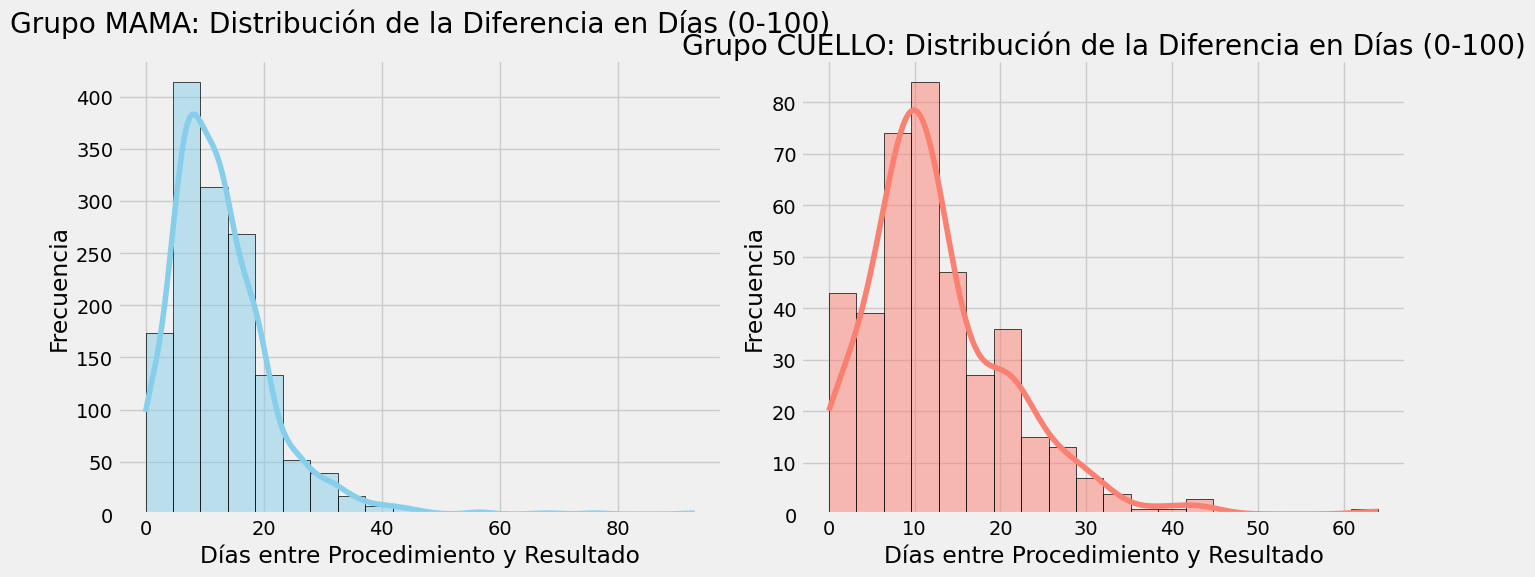

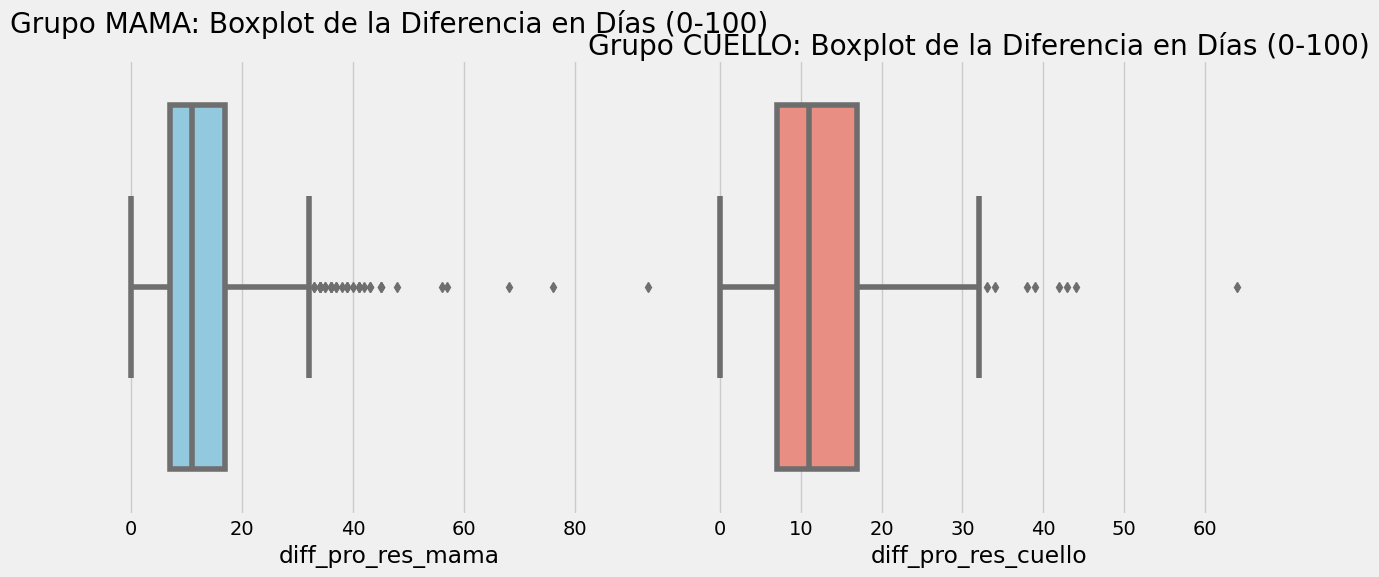

In [ ]:

# Filtrar los datos para incluir solo diferencias de hasta 100 días en ambos grupos
filtered_mama = grupo_mama[grupo_mama['diff_pro_res_mama'] <= 100]
filtered_cuello = grupo_cuello[grupo_cuello['diff_pro_res_cuello'] <= 100]

plt.figure(figsize=(14, 6))

# Histograma y KDE para el Grupo MAMA (filtrado por 100 días)
plt.subplot(1, 2, 1)
sns.histplot(filtered_mama['diff_pro_res_mama'].dropna(), bins=20, kde=True, color="skyblue", edgecolor="black")
plt.title('Grupo MAMA: Distribución de la Diferencia en Días (0-100)', pad=20)
plt.xlabel('Días entre Procedimiento y Resultado')
plt.ylabel('Frecuencia')

# Histograma y KDE para el Grupo CUELLO (filtrado por 100 días)
plt.subplot(1, 2, 2)
sns.histplot(filtered_cuello['diff_pro_res_cuello'].dropna(), bins=20, kde=True, color="salmon", edgecolor="black")
plt.title('Grupo CUELLO: Distribución de la Diferencia en Días (0-100)', pad=1)
plt.xlabel('Días entre Procedimiento y Resultado')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Boxplots para identificar outliers dentro del rango de 100 días

plt.figure(figsize=(12, 6))

# Boxplot para el Grupo MAMA
plt.subplot(1, 2, 1)
sns.boxplot(x=filtered_mama['diff_pro_res_mama'].dropna(), color="skyblue")
plt.title('Grupo MAMA: Boxplot de la Diferencia en Días (0-100)', pad=20)

# Boxplot para el Grupo CUELLO
plt.subplot(1, 2, 2)
sns.boxplot(x=filtered_cuello['diff_pro_res_cuello'].dropna(), color="salmon")
plt.title('Grupo CUELLO: Boxplot de la Diferencia en Días (0-100)', pad=1)

plt.tight_layout()
plt.show()


Observaciones del Histograma y KDE

    Grupo MAMA:
        La mayor parte de los tiempos de espera está concentrada entre 5 y 20 días, con un pico alrededor de los 10 días.
        La curva KDE muestra una caída rápida después de los 20 días, lo cual sugiere que la mayoría de los casos tienen tiempos de espera relativamente cortos. Algunos outliers están presentes en el rango de 40 a 80 días, pero son pocos.

    Grupo CUELLO:
        La distribución es similar a la del grupo MAMA, con la mayoría de los casos entre 5 y 20 días y un pico en los 10 días.
        La cola de la distribución es más corta que en MAMA, indicando menos casos con tiempos de espera prolongados en este rango (0-100 días). Sin embargo, el grupo también tiene algunos outliers, aunque no tan extremos.

Observaciones del Boxplot

    Grupo MAMA:
        La mediana está cerca de los 10 días. Existen varios outliers después del límite superior de 20 días, lo que indica que hay casos con tiempos de espera más largos.
        La dispersión en este grupo es ligeramente mayor, mostrando un rango intercuartílico más amplio.

    Grupo CUELLO:
        La mediana es también cercana a los 10 días. La cantidad de outliers en este grupo es menor, y los valores se distribuyen en un rango menor en comparación con MAMA.
        Esto sugiere que, en general, los tiempos de espera para el grupo CUELLO tienden a estar más concentrados y tienen menos variabilidad.

Conclusiones

    Ambos grupos presentan patrones similares en los tiempos de espera, con una tendencia a obtener resultados en un rango de 5 a 20 días.
    El grupo MAMA tiene una mayor dispersión y algunos tiempos de espera más prolongados, indicando posibles demoras en ciertos casos.
    El grupo CUELLO muestra menos variabilidad en los tiempos de espera, lo cual podría deberse a un manejo más uniforme de los procedimientos o a una menor complejidad en el proceso de resultados.

Este análisis sugiere que, aunque ambos grupos presentan tiempos de espera mayormente razonables, el grupo MAMA tiene una mayor probabilidad de experimentar demoras. Esto podría ser un aspecto relevante para explorar en la mejora de los tiempos de entrega de resultados.

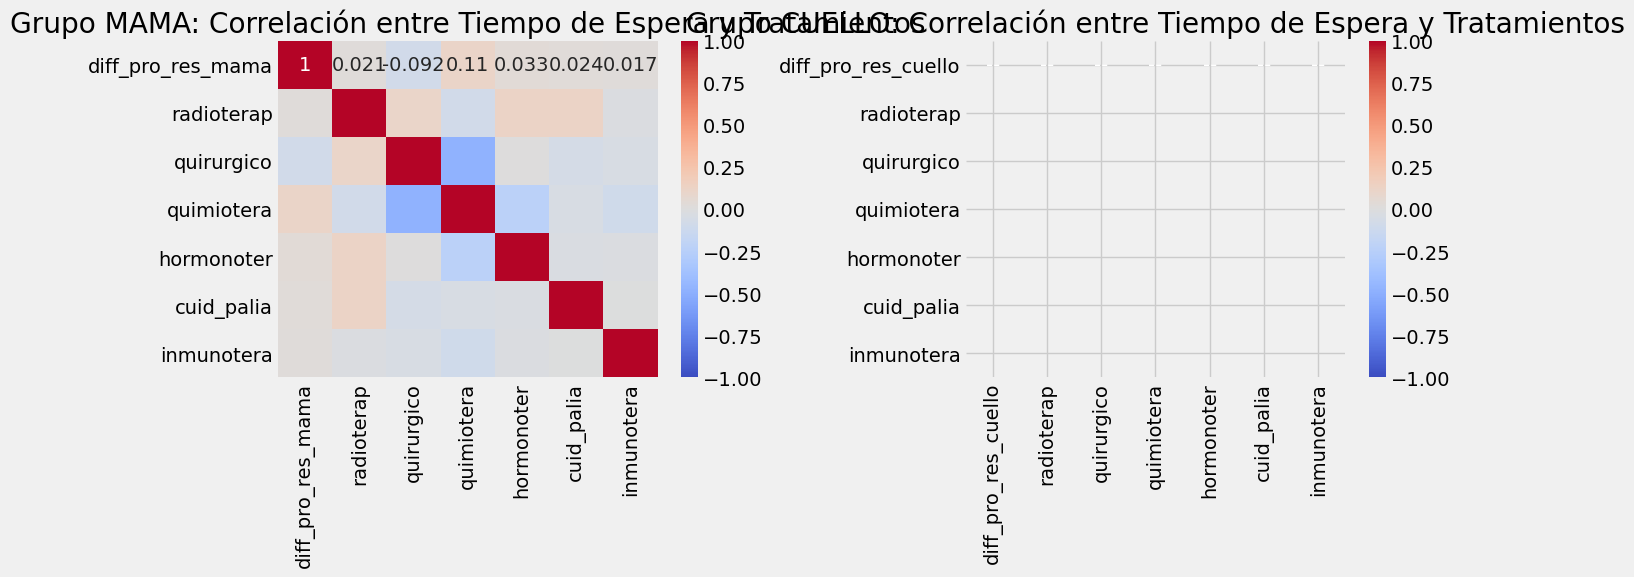

In [ ]:
# Paso 1: Excluir filas con "No aplica" o "No info" en las columnas de tratamiento
mama_filtered = grupo_mama[
    ~grupo_mama[['radioterap', 'quirurgico', 'quimiotera', 'hormonoter', 'cuid_palia', 'inmunotera', 'fch_seg_tr']]
    .isin(["No aplica", "No info"]).any(axis=1)
]

cuello_filtered = grupo_cuello[
    ~grupo_cuello[['radioterap', 'quirurgico', 'quimiotera', 'hormonoter', 'cuid_palia', 'inmunotera', 'fch_seg_tr']]
    .isin(["No aplica", "No info"]).any(axis=1)
]

# Paso 2: Seleccionar las columnas relevantes para el análisis de correlación (excluyendo `fch_seg_tr`)
# Grupo MAMA
mama_treatment_corr = mama_filtered[['diff_pro_res_mama', 'radioterap', 'quirurgico', 'quimiotera',
                                     'hormonoter', 'cuid_palia', 'inmunotera']].astype(float).corr()

# Grupo CUELLO
cuello_treatment_corr = cuello_filtered[['diff_pro_res_cuello', 'radioterap', 'quirurgico', 'quimiotera',
                                         'hormonoter', 'cuid_palia', 'inmunotera']].astype(float).corr()

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Mapa de calor para el Grupo MAMA
plt.subplot(1, 2, 1)
sns.heatmap(mama_treatment_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Grupo MAMA: Correlación entre Tiempo de Espera y Tratamientos")

# Mapa de calor para el Grupo CUELLO
plt.subplot(1, 2, 2)
sns.heatmap(cuello_treatment_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Grupo CUELLO: Correlación entre Tiempo de Espera y Tratamientos")

plt.tight_layout()
plt.show()




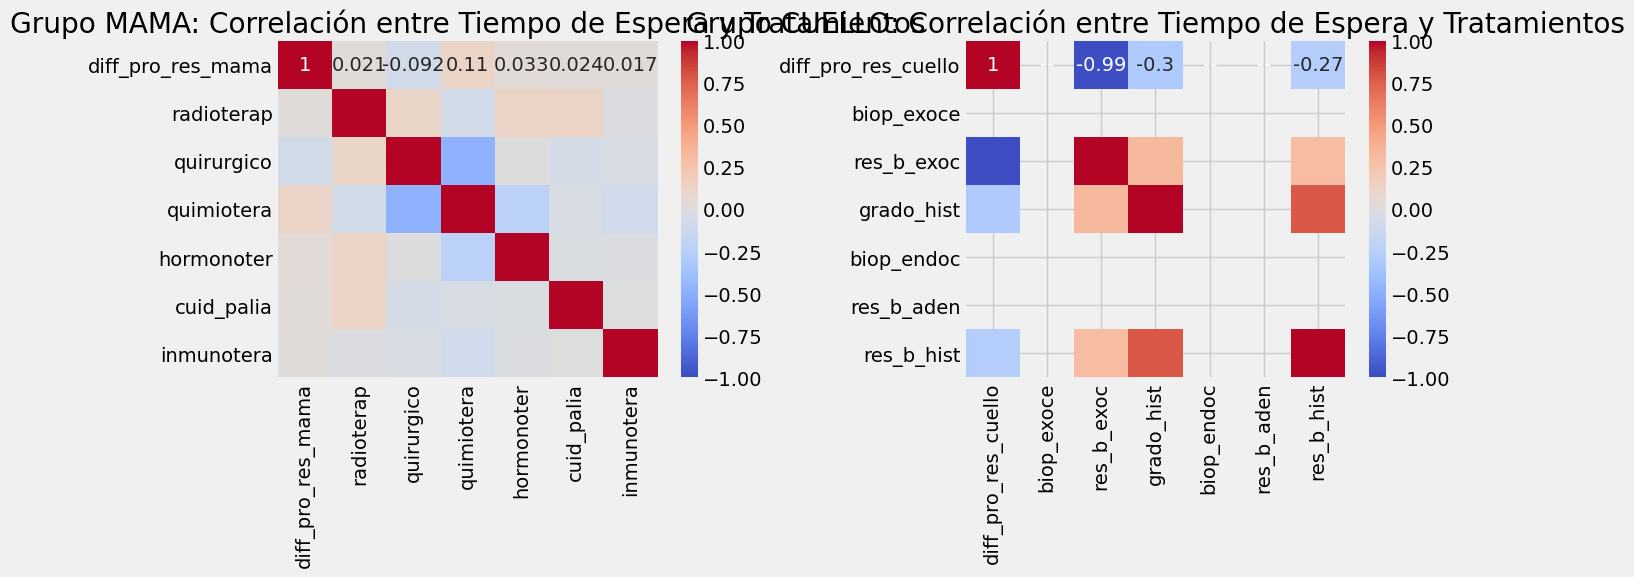

In [ ]:

# Filtrar filas que no contienen "No aplica" ni "No info" en las columnas de tratamiento para cada grupo específico
# Variables exclusivas para el grupo MAMA
mama_filtered = grupo_mama[
    ~grupo_mama[['radioterap', 'quirurgico', 'quimiotera', 'hormonoter', 'cuid_palia', 'inmunotera']]
    .isin(["No aplica", "No info"]).any(axis=1)
]

# Variables exclusivas para el grupo CUELLO
cuello_filtered = grupo_cuello[
    ~grupo_cuello[['biop_exoce', 'res_b_exoc', 'grado_hist', 'biop_endoc', 'res_b_aden', 'res_b_hist']]
    .isin(["No aplica", "No info","Desconocido"]).any(axis=1)
]

# Calcular las correlaciones en los datos filtrados para cada grupo
# Grupo MAMA
mama_treatment_corr = mama_filtered[['diff_pro_res_mama', 'radioterap', 'quirurgico', 'quimiotera',
                                     'hormonoter', 'cuid_palia', 'inmunotera']].astype(float).corr()

# Grupo CUELLO
cuello_treatment_corr = cuello_filtered[['diff_pro_res_cuello', 'biop_exoce', 'res_b_exoc', 'grado_hist',
                                         'biop_endoc', 'res_b_aden', 'res_b_hist']].astype(float).corr()

# Visualización
plt.figure(figsize=(14, 6))

# Mapa de calor para el Grupo MAMA
plt.subplot(1, 2, 1)
sns.heatmap(mama_treatment_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Grupo MAMA: Correlación entre Tiempo de Espera y Tratamientos")

# Mapa de calor para el Grupo CUELLO
plt.subplot(1, 2, 2)
sns.heatmap(cuello_treatment_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Grupo CUELLO: Correlación entre Tiempo de Espera y Tratamientos")

plt.tight_layout()
plt.show()

In [ ]:
# Verificar si quedan valores NaN en las columnas de tratamiento después de filtrar
print("Grupo MAMA - Valores faltantes después del filtrado:")
print(mama_filtered[['diff_pro_res_mama', 'radioterap', 'quirurgico', 'quimiotera',
                     'hormonoter', 'cuid_palia', 'inmunotera']].isna().sum())

print("\nGrupo CUELLO - Valores faltantes después del filtrado:")
print(cuello_filtered[['diff_pro_res_cuello', 'biop_exoce', 'res_b_exoc', 'grado_hist',
                      'biop_endoc', 'res_b_aden', 'res_b_hist']].isna().sum())


Grupo MAMA - Valores faltantes después del filtrado:
diff_pro_res_mama    0
radioterap           0
quirurgico           0
quimiotera           0
hormonoter           0
cuid_palia           0
inmunotera           0
dtype: int64

Grupo CUELLO - Valores faltantes después del filtrado:
diff_pro_res_cuello    0
biop_exoce             0
res_b_exoc             0
grado_hist             0
biop_endoc             0
res_b_aden             0
res_b_hist             0
dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Cargar tus datos
# Asegúrate de reemplazar 'archivo.csv' con la ruta a tu archivo y de que df sea tu DataFrame de interés
# Carga los archivos
df = pd.read_excel('D:\Escritorio\CABARRANQUILLA\Ca mama de  y cuello uterino\CAMAMA2022-2024_final_with_localidad_mapping.xlsx')

# Lista de variables demográficas (ajusta según tus necesidades)
demographic_vars = [
    'edad_', 'sexo_', 'cod_dpto_o', 'cod_mun_o', 'area_', 'localidad_',
    'ocupacion_', 'per_etn_', 'gp_discapa', 'gp_desplaz', 'gp_migrant',
    'gp_indigen', 'estrato_'
]

# Filtrar solo las columnas que existen en el DataFrame
demographic_vars = [col for col in demographic_vars if col in df.columns]

# Verificar si hay columnas disponibles para el modelo
if not demographic_vars:
    raise ValueError("No hay variables demográficas disponibles para el análisis.")

# Filtrar las columnas demográficas y la variable objetivo
X = df[demographic_vars]
y = df['tipo_cance']

# Codificar variables categóricas si es necesario
X = pd.get_dummies(X, drop_first=True)  # Convertir variables categóricas a dummy variables
le = LabelEncoder()
y = le.fit_transform(y)  # Codificar la variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar un modelo de Random Forest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluar el modelo
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Mostrar importancia de las características
importances = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", importances)

Accuracy: 0.7047101449275363
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       413
           1       0.37      0.24      0.29       139

    accuracy                           0.70       552
   macro avg       0.57      0.55      0.55       552
weighted avg       0.67      0.70      0.68       552

Feature Importances:
                        Feature  Importance
0                        edad_    0.680933
5                     estrato_    0.096376
3                   ocupacion_    0.084438
4                     per_etn_    0.013648
58     localidad__SUROCCIDENTE    0.013036
..                         ...         ...
24       localidad__CANDELARIA    0.000000
27  localidad__CETRO HISTORICO    0.000000
42          localidad__REPELON    0.000000
43         localidad__RIOHACHA    0.000000
63    localidad__VILLA ESTADIO    0.000000

[64 rows x 2 columns]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Supongamos que 'df' es tu DataFrame
# Asegúrate de que las variables 'demographic_vars' estén definidas según tu contexto
demographic_vars = [
    'edad_', 'sexo_', 'cod_dpto_o', 'cod_mun_o', 'area_', 'localidad_',
    'ocupacion_', 'per_etn_', 'gp_discapa', 'gp_desplaz', 'gp_migrant',
    'gp_indigen', 'estrato_'
]
demographic_vars = [col for col in demographic_vars if col in df.columns]

# Seleccionar solo las columnas que existen y la variable objetivo
X = df[demographic_vars]
y = df['tipo_cance']

# Imputar valores faltantes en X
imputer = SimpleImputer(strategy='most_frequent')  # Puedes cambiar la estrategia según tu necesidad
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Codificar variables categóricas
X = pd.get_dummies(X, drop_first=True)
le = LabelEncoder()
y = le.fit_transform(y)

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Evaluar el modelo
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.75
